In [1]:
%pip -q install qiskit qiskit_ibm_runtime pylatexenc matplotlib qiskit-ibm-provider qiskit-aer


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: c:\Users\X\Documents\College\CS\sem4\NMISAT\Project\Quantum_Arithmetic_Project\.venv\Scripts\python.exe -m pip install --upgrade pip


In [6]:
%pip install qiskit-aer

   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ------ --------------------------------- 1.6/9.5 MB 9.3 MB/s eta 0:00:01
   ---------------- ----------------------- 3.9/9.5 MB 9.8 MB/s eta 0:00:01
   --------------------------- ------------ 6.6/9.5 MB 10.6 MB/s eta 0:00:01
   ------------------------------------ --- 8.7/9.5 MB 10.5 MB/s eta 0:00:01
   ---------------------------------------- 9.5/9.5 MB 10.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


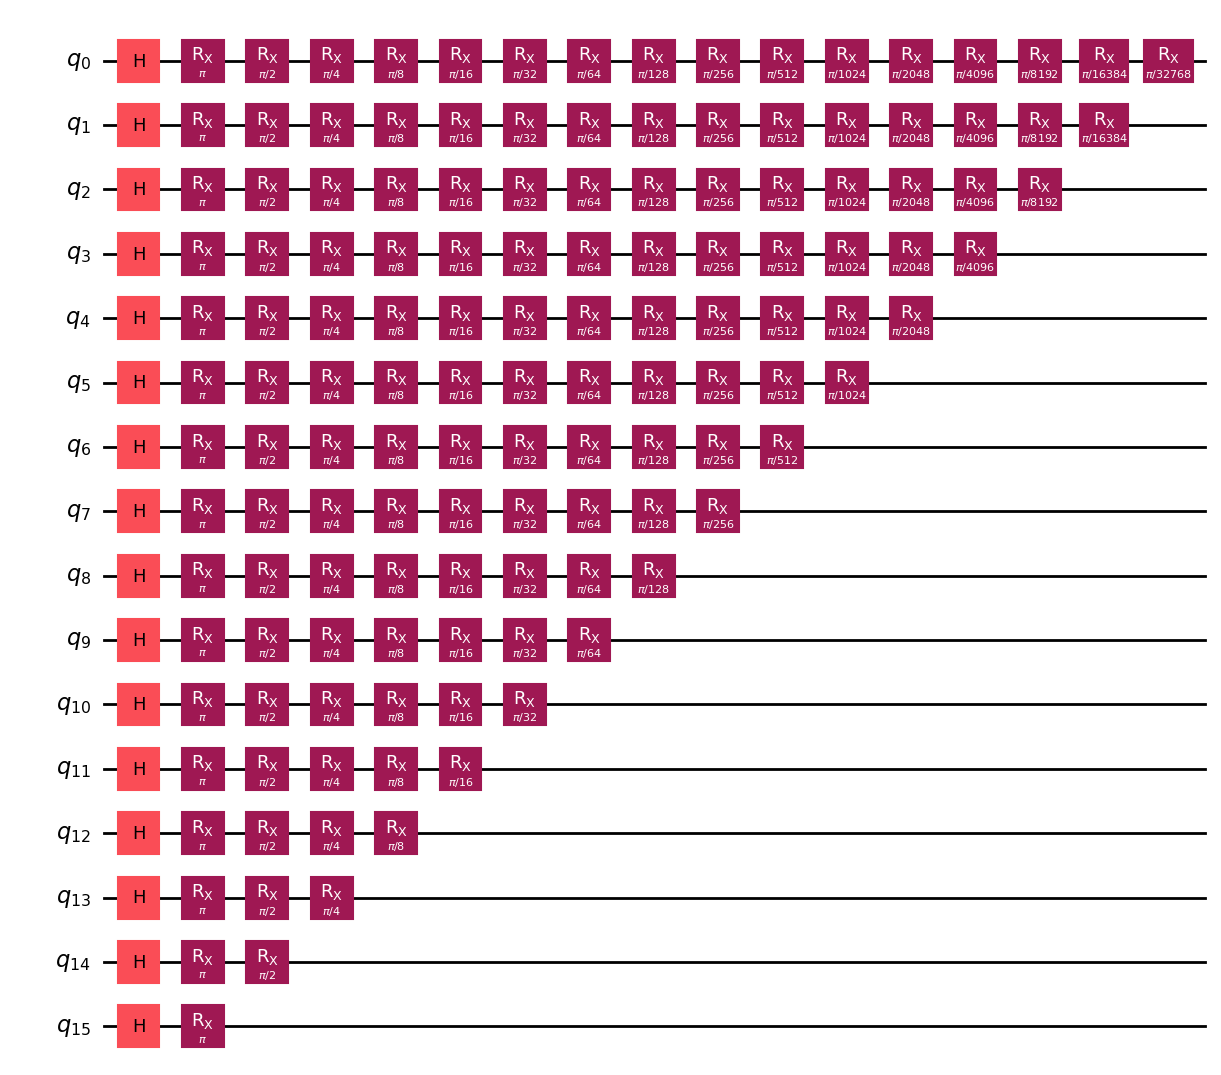

In [9]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
import numpy as np
n = 16
# Create a new circuit with two qubits
qc = QuantumCircuit(n)

for i in range(n):
    qc.h(i)
    for j in range(i, n):
        angle = np.pi / 2**(j - i)
        qc.rx(angle, i)

qc.draw("mpl")

In [10]:
from qiskit import QuantumCircuit
import numpy as np

def qft(n):
    qc = QuantumCircuit(n)
    
    # Apply the QFT
    for i in range(n):
        qc.h(i)
        for j in range(i+1, n):
            angle = np.pi / 2**(j - i)
            qc.cp(angle, j, i)  # Controlled phase gate
            
    # Swap the qubits to reverse the order
    for i in range(n // 2):
        qc.swap(i, n - i - 1)
    
    qc.name = "QFT"
    return qc


In [11]:
from qiskit import QuantumCircuit
from qiskit_aer.primitives import Sampler
import numpy as np

# Create a test circuit
n = 3
qc = QuantumCircuit(n)
qc.x(0)  # Set state to |001⟩
qc.h(1)
qc.cx(1, 2)

# Simulate using the Sampler primitive
sampler = Sampler()
job = sampler.run(qc)
result = job.result()
quasi_dist = result.quasi_dists[0]

print("Quasi-probability distribution:")
print(quasi_dist)


ValueError: The 0-th circuit does not have any classical bit. Sampler requires classical bits, plus measurements on the desired qubits.

In [12]:
# Number of qubits
n = 3

# Create a quantum circuit with n qubits
qc = QuantumCircuit(n)

# Initialize the circuit to the |001⟩ state
qc.x(0)

# Append the QFT circuit
qc.append(qft(n), range(n))

# Use the statevector simulator
simulator = Aer.get_backend('statevector_simulator')

# Transpile the circuit for the simulator
tqc = transpile(qc, simulator)

# Assemble the transpiled circuit into a Qobj
qobj = assemble(tqc)

# Execute the simulation
result = simulator.run(qobj).result()

# Get the resulting statevector
statevector = result.get_statevector()

print("Output Statevector:")
print(statevector)


NameError: name 'assemble' is not defined

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
service = QiskitRuntimeService()
 
backend = service.least_busy(simulator=False, operational=True)
 
# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
 
isa_circuit.draw("mpl", idle_wires=False)

AccountNotFoundError: 'Unable to find account.'